# 第3章　基于OpenCV的图像处理

In [12]:
import cv2
from cv2 import normalize
import numpy as np
from matplotlib import pyplot as plt

## 轮廓检测

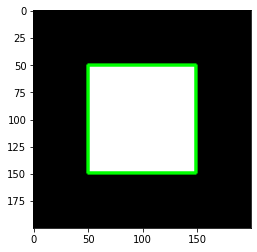

In [13]:
img = np.zeros((200,200), dtype=np.uint8)
img[50:150,50:150] = 255

ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0,255,0), 2)
plt.imshow(img)
plt.show()

## 边框，最小矩形区域及最小外接圆
- pyrDown 先对图像进行高斯平滑，然后再进行降采样（将图像尺寸行和列方向缩减一半) 
- pyrUp 先对图像进行升采样（将图像尺寸行和列方向增大一倍），然后再进行高斯平滑

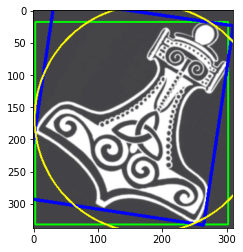

In [14]:
img = cv2.pyrDown(cv2.imread("images/hammer.jpg", cv2.IMREAD_UNCHANGED))
# screenshot.png
# img = cv2.pyrDown(cv2.imread("screenshot.png", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) ,127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 针对每个轮廓寻找并画出边框、最小外接矩形和最小外接圆
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),2)

    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img, [box], 0, (0,0,255), 3)

    (x,y), radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    img = cv2.circle(img, center, radius, (255,255,0), 2)

plt.imshow(img)
plt.show()

## 凸轮廓和Douglas-Peucker算法

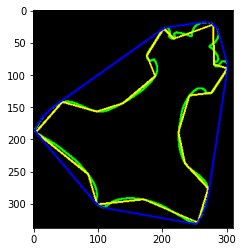

In [15]:
img = cv2.pyrDown(cv2.imread("images/hammer.jpg", cv2.IMREAD_UNCHANGED))
ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) ,127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
black = np.zeros_like(img)
for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon,True)
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black,[cnt],-1,(0,255,0),2)
    cv2.drawContours(black, [approx],-1,(255,255,0),2)
    cv2.drawContours(black, [hull], -1, (0,0,255),2)
plt.imshow(black)
plt.show()

## 检测线
- HoughLines函数使用标准霍夫变换，而HoughLinesP函数使用概率霍夫变换（因此名称中有P）

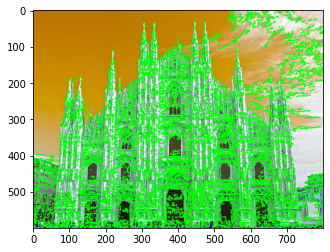

In [18]:
import cv2
import numpy as np
img = cv2.imread("images/lines.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 1
lines = cv2.HoughLinesP(edges,1,np.pi/180.0,20,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img)
plt.show()

## 检测圆

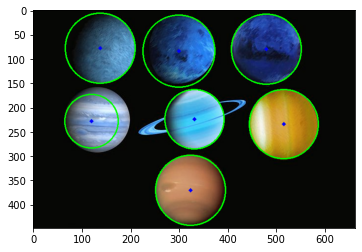

In [17]:
import cv2
import numpy as np

planets = cv2.imread("images/planet_glow.jpg")
gray_img = cv2.cvtColor(planets,cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img,5)
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT,1,120,param1=100,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(planets)
plt.show()